## RLE on a single picture

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O
from skimage.data import imread
import matplotlib.pyplot as plt

In [2]:
# Input data files are available in the "../input/" directory
# Shift + Enter to list the files in the input directory
import os
PATH = "F:/[Base] Code/DataSets/airbus-ship-detection"
print(os.listdir(PATH))

['sample_submission_v2.csv', 'test_v2', 'train_ship_segmentations_v2.csv', 'train_v2']


In [3]:
train = os.listdir(PATH + '/train_v2')
print(len(train))
test = os.listdir(PATH + '/test_v2')
print(len(test))

192556
15606


In [4]:
masks = pd.read_csv(PATH + '/train_ship_segmentations_v2.csv')
masks.head(10)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...
8,0001b1832.jpg,NaN
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...


In [5]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
# run-length-encode-and-decode
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

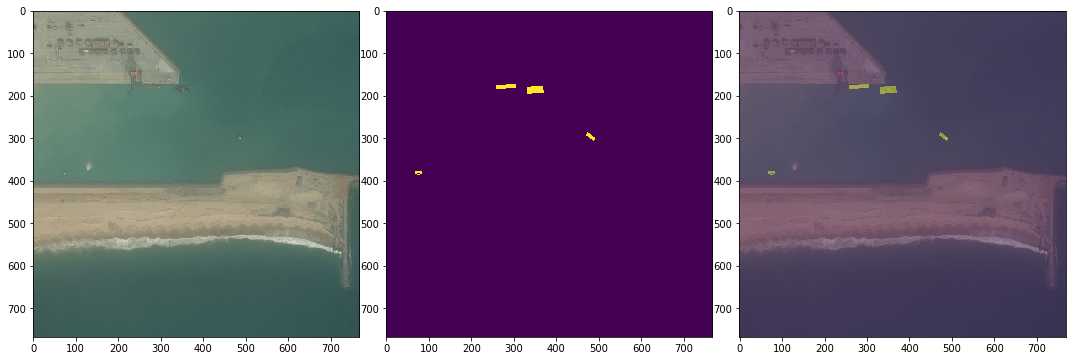

In [6]:
ImageId = '000194a2d.jpg'
img = imread(PATH + '/train_v2/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768)) # purple
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('on')
axarr[1].axis('on')
axarr[2].axis('on')

axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4) # alpha denotes transparency
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()